In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as font_manager

In [2]:
# 한글 폰트 찾기
import matplotlib.font_manager as font_manager

# 특정 위치에 있는 모든 폰트 찾기
font_dir = ['/Users/kimminsoo/Library/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

# font.family 설정
mpl.rcParams['font.family'] = 'NanumGothicOTF'
print(mpl.rcParams['font.family'])

MesloLGS NF
NanumGothicOTF
Kyobo Handwriting 2021
MesloLGS NF
MesloLGS NF
?????
MesloLGS NF
NanumGothic
['NanumGothicOTF']


# 1. 데이터 산업 업종별 영위 기업수
        1) xlsx파일에서 csv파일로 변환
        2) 컬럼명 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경
        3) 연도별 업종 중분류 영위 기업수(barplot)
        4) 연도별 업종 소분류 영위 기업수(barplot)
        5) 2021년 기준 업종 중분류별 점유율(pie chart) - pie chart 미완료
        6) 2021년 기준 업종 소분류별 점유율(pie chart) - pie chart 미완료

### 1) xlsx 파일에서 csv 파일로 변환

In [3]:
# xlsx파일 데이터를 csv로 변환 후 DataFrame형태로 불러오기 
xlsx = pd.read_excel('../data/data_ids_companycounts.xlsx')
data_report = xlsx.to_csv('../data/data_ids_companycounts.csv')
data_ids_report = pd.read_csv('../data/data_ids_companycounts.csv', index_col=0).reset_index(drop=True)

data_ids_report

,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,879,854,150,199,235,302
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,2041,310,287,367,494,567
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,303,2617,2065,2222,2282,2419


### 2) 컬럼명 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경, 연도 컬럼명 "년"을 제거

In [4]:
# 'unnamed: 0', 'unnamed:1'을 컬럼명 변경
data_ids_report.rename(columns={
                       data_ids_report.columns[0] : '업종 중분류',
                       data_ids_report.columns[1] : '업종 소분류',
                       data_ids_report.columns[2] : '2016',
                       data_ids_report.columns[3] : '2017',
                       data_ids_report.columns[4] : '2018',
                       data_ids_report.columns[5] : '2019',
                       data_ids_report.columns[6] : '2020',
                       data_ids_report.columns[7] : '2021',}, inplace=True)

# 다른 방법: columns={'Unnamed: 0': '업종 중분류', 'Unnamed: 1' : '업종 소분류'}, inplace=True)

data_ids_report

,업종 중분류,업종 소분류,2016,2017,2018,2019,2020,2021
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,879,854,150,199,235,302
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,2041,310,287,367,494,567
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,303,2617,2065,2222,2282,2419


In [14]:
# 데이터 전처리 완료한 데이터프레임 csv파일로 저장
data_ids_report.to_csv('../data/data_ids_companycounts.csv', index=False)

### 3) 연도별 업종 중분류 영위 기업수(barplot)

In [131]:
# 업종 소분류 컬럼 삭제
mid_ids_report = data_ids_report.drop(['업종 소분류'], axis=1)

# 업종 중분류 별 합계 리스트 생성
mid1 = mid_ids_report.loc[0:5].sum()
mid2 = mid_ids_report.loc[6:7].sum()
mid3 = mid_ids_report.loc[8:9].sum()
mid1[0] = "데이터 처리 및 관리 솔루션 개발·공급업"
mid2[0] = "데이터 구축 및 컨설팅 서비스업"
mid3[0] = "데이터 판매 및 제공 서비스업"

# 생성된 리스트 데이터프레임 형태로 변환
mid_ids_report = pd.DataFrame([mid1, mid2, mid3]).set_index("업종 중분류")
mid_ids_report

,2016,2017,2018,2019,2020,2021
업종 중분류,,,,,,
데이터 처리 및 관리 솔루션 개발·공급업,2580,2462,2130,2356,2487,2796
데이터 구축 및 컨설팅 서비스업,2681,2598,2671,2674,2751,2958
데이터 판매 및 제공 서비스업,2344,2927,2352,2589,2776,2986


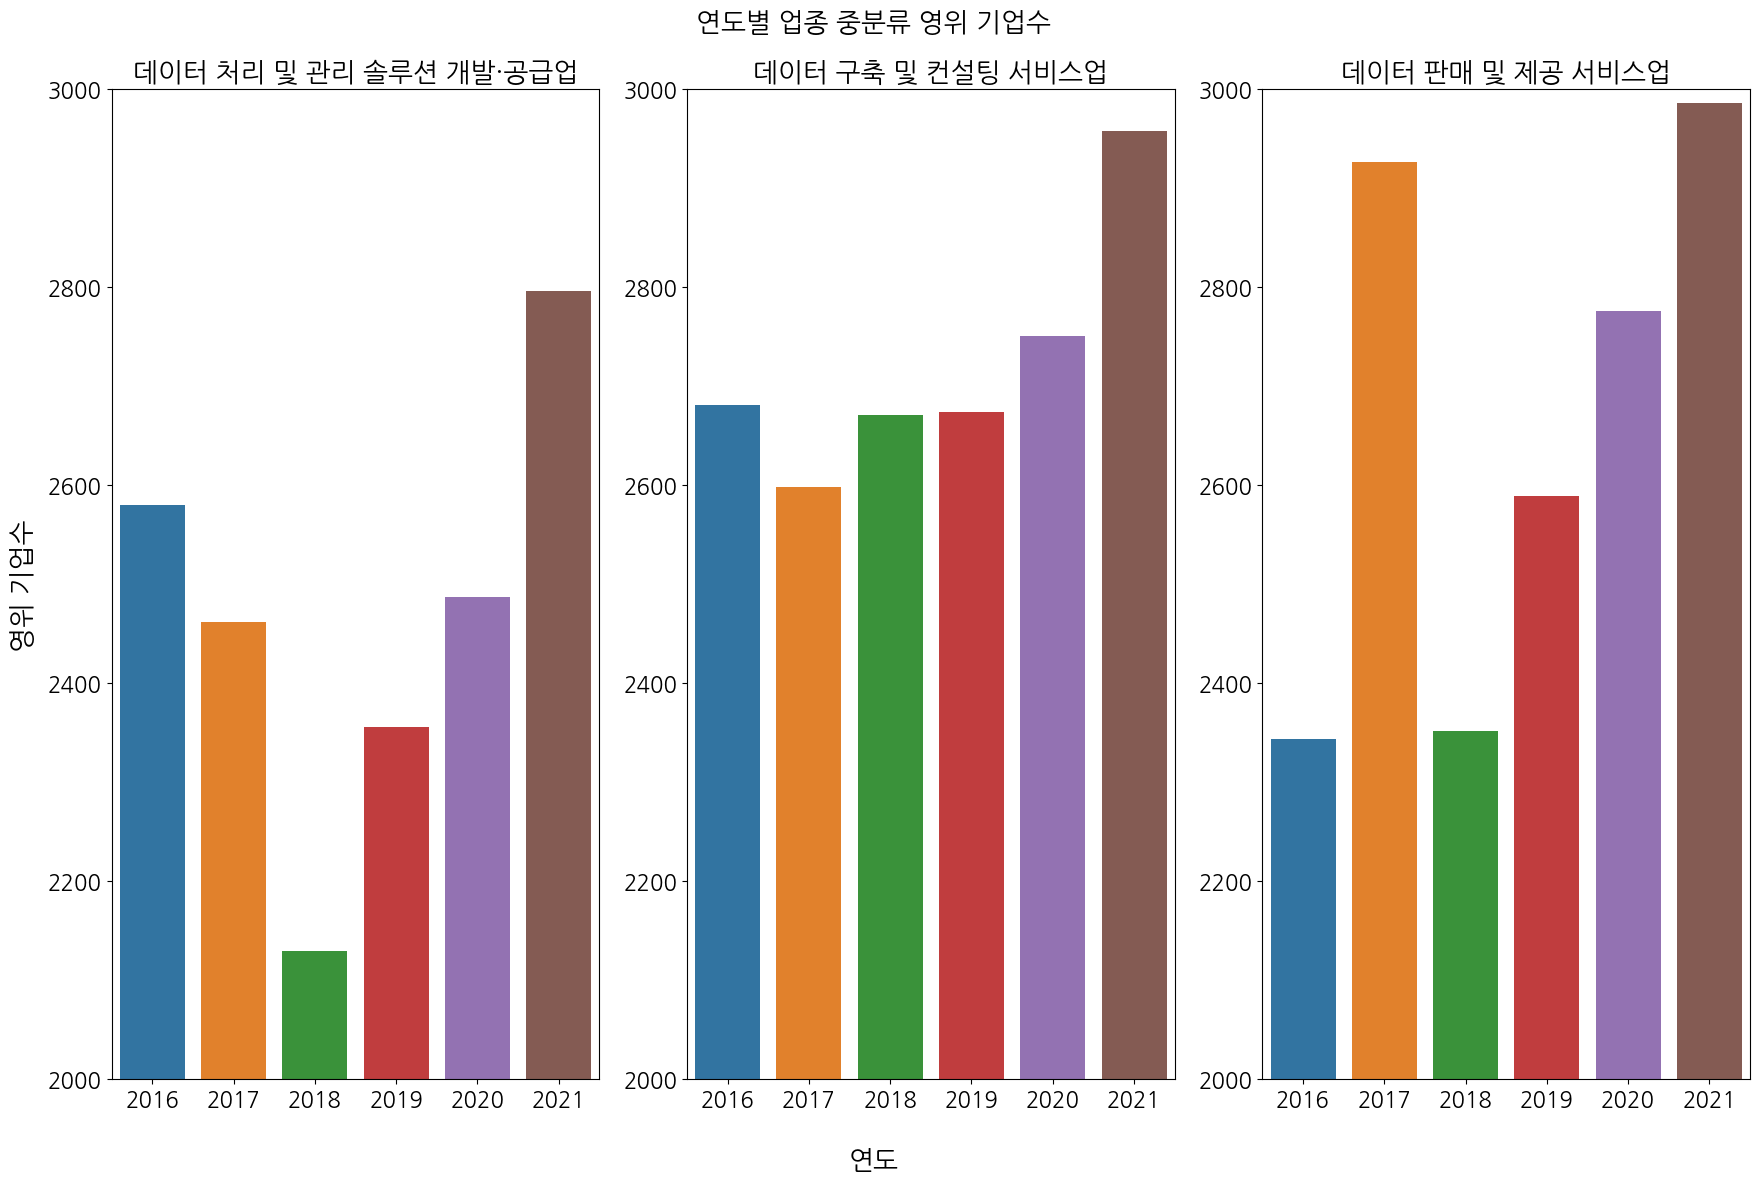

In [132]:
# 중분류 영위 기업수 시각화 - barplot
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,3)

fig.suptitle("연도별 업종 중분류 영위 기업수")
fig.supxlabel("연도")
fig.supylabel("영위 기업수")

for index in range(len(mid_ids_report.index)):
    sns.barplot(x=mid_ids_report.columns.astype(int), 
                y=mid_ids_report.iloc[index], 
                ax=axs[index])
    axs[index].set_ylim(2000, 3000)
    axs[index].set_title(mid_ids_report.index[index])
    axs[index].set_ylabel(None)
plt.tight_layout()
plt.show()

### 4) 연도별 업종 소분류 영위 기업수(barplot)

In [133]:
# 업종 중분류 컬럼 삭제
sub_ids_report = data_ids_report.drop(["업종 중분류"], axis=1).set_index("업종 소분류")
sub_ids_report

,2016,2017,2018,2019,2020,2021
업종 소분류,,,,,,
데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
데이터 보안 솔루션 개발·공급업,879,854,150,199,235,302
빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
데이터 판매/중개 서비스업,2041,310,287,367,494,567


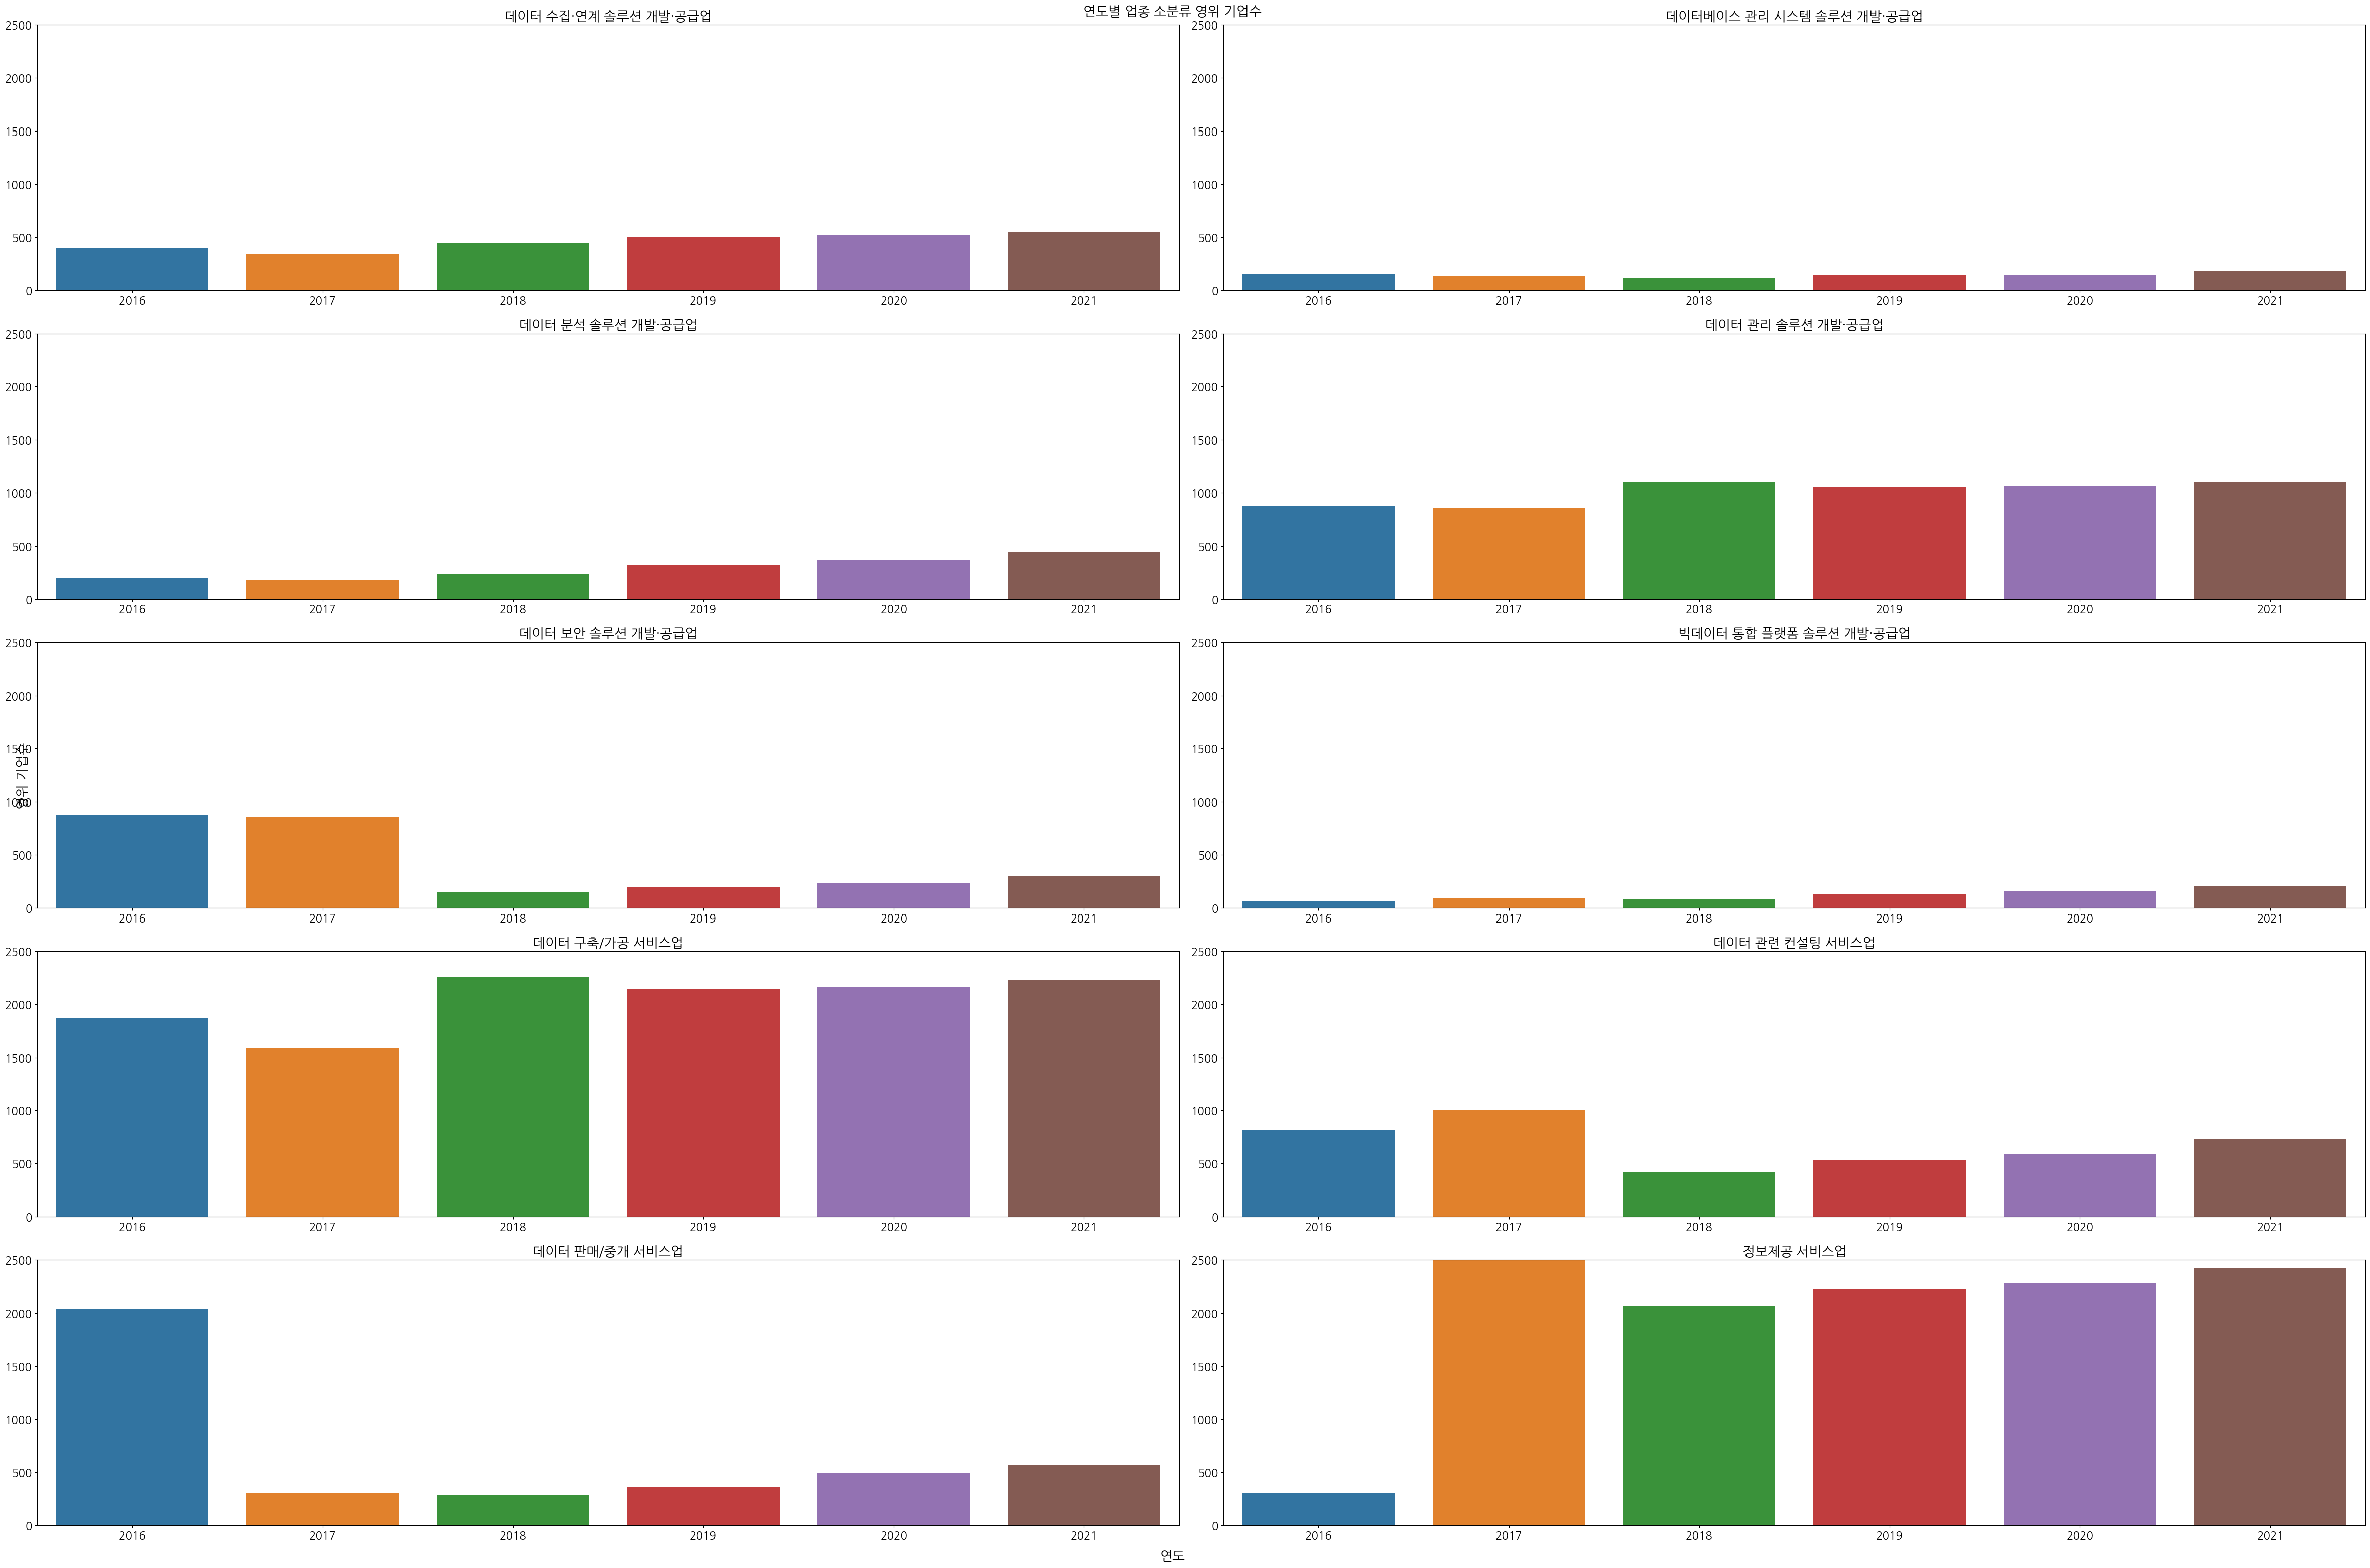

In [143]:
# 소분류 영위 기업수 시각화 - barplot
plt.rcParams["figure.figsize"] = (48,32)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(5,2)

fig.suptitle("연도별 업종 소분류 영위 기업수")
fig.supxlabel("연도")
fig.supylabel("영위 기업수")

for index in range(len(sub_ids_report.index)):
    sns.barplot(x=sub_ids_report.columns.astype(int), 
                y=sub_ids_report.iloc[index], 
                ax=axs[index // 2, index % 2])
    axs[index // 2, index % 2].set_ylim(0, 2500)
    axs[index // 2, index % 2].set_title(sub_ids_report.index[index])
    axs[index // 2, index % 2].set_ylabel(None)
plt.tight_layout()
plt.show()

### 5) 2021년 기준 업종 중분류별 점유율(pie chart)

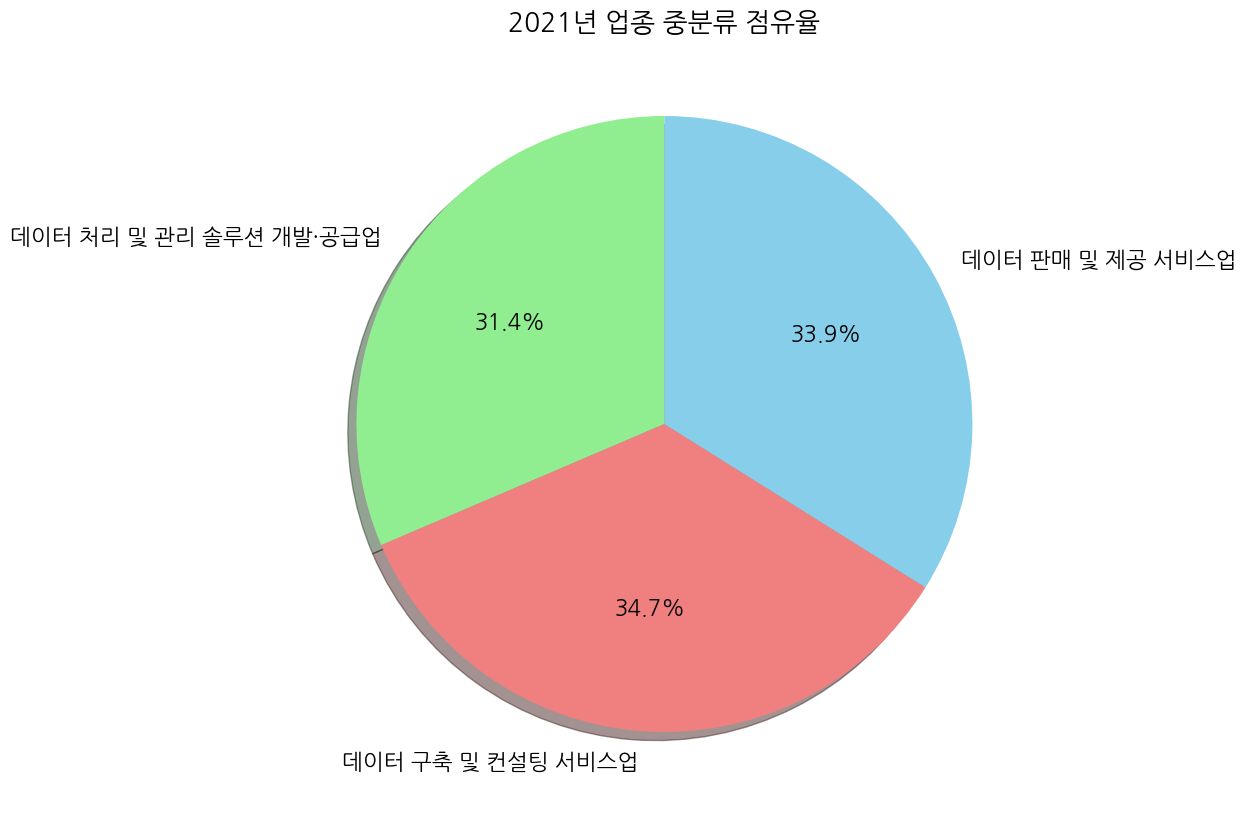

In [149]:
# 2021년 중분류 영위 기업수 시각화 - pie chart
mid_total = mid_ids_report.round(1).sum(axis=1)
mid_totals = ((mid_total / mid_total.sum()) * 100)

explode = [0,0,0]
colors = ['lightgreen', 'lightcoral', 'skyblue']

fig = plt.figure(figsize=(10,10))
plt.title('2021년 업종 중분류 점유율')
plt.pie(mid_totals.values, explode=explode, labels=mid_totals.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### 6) 2021년 기준 업종 소분류별 점유율(pie chart)

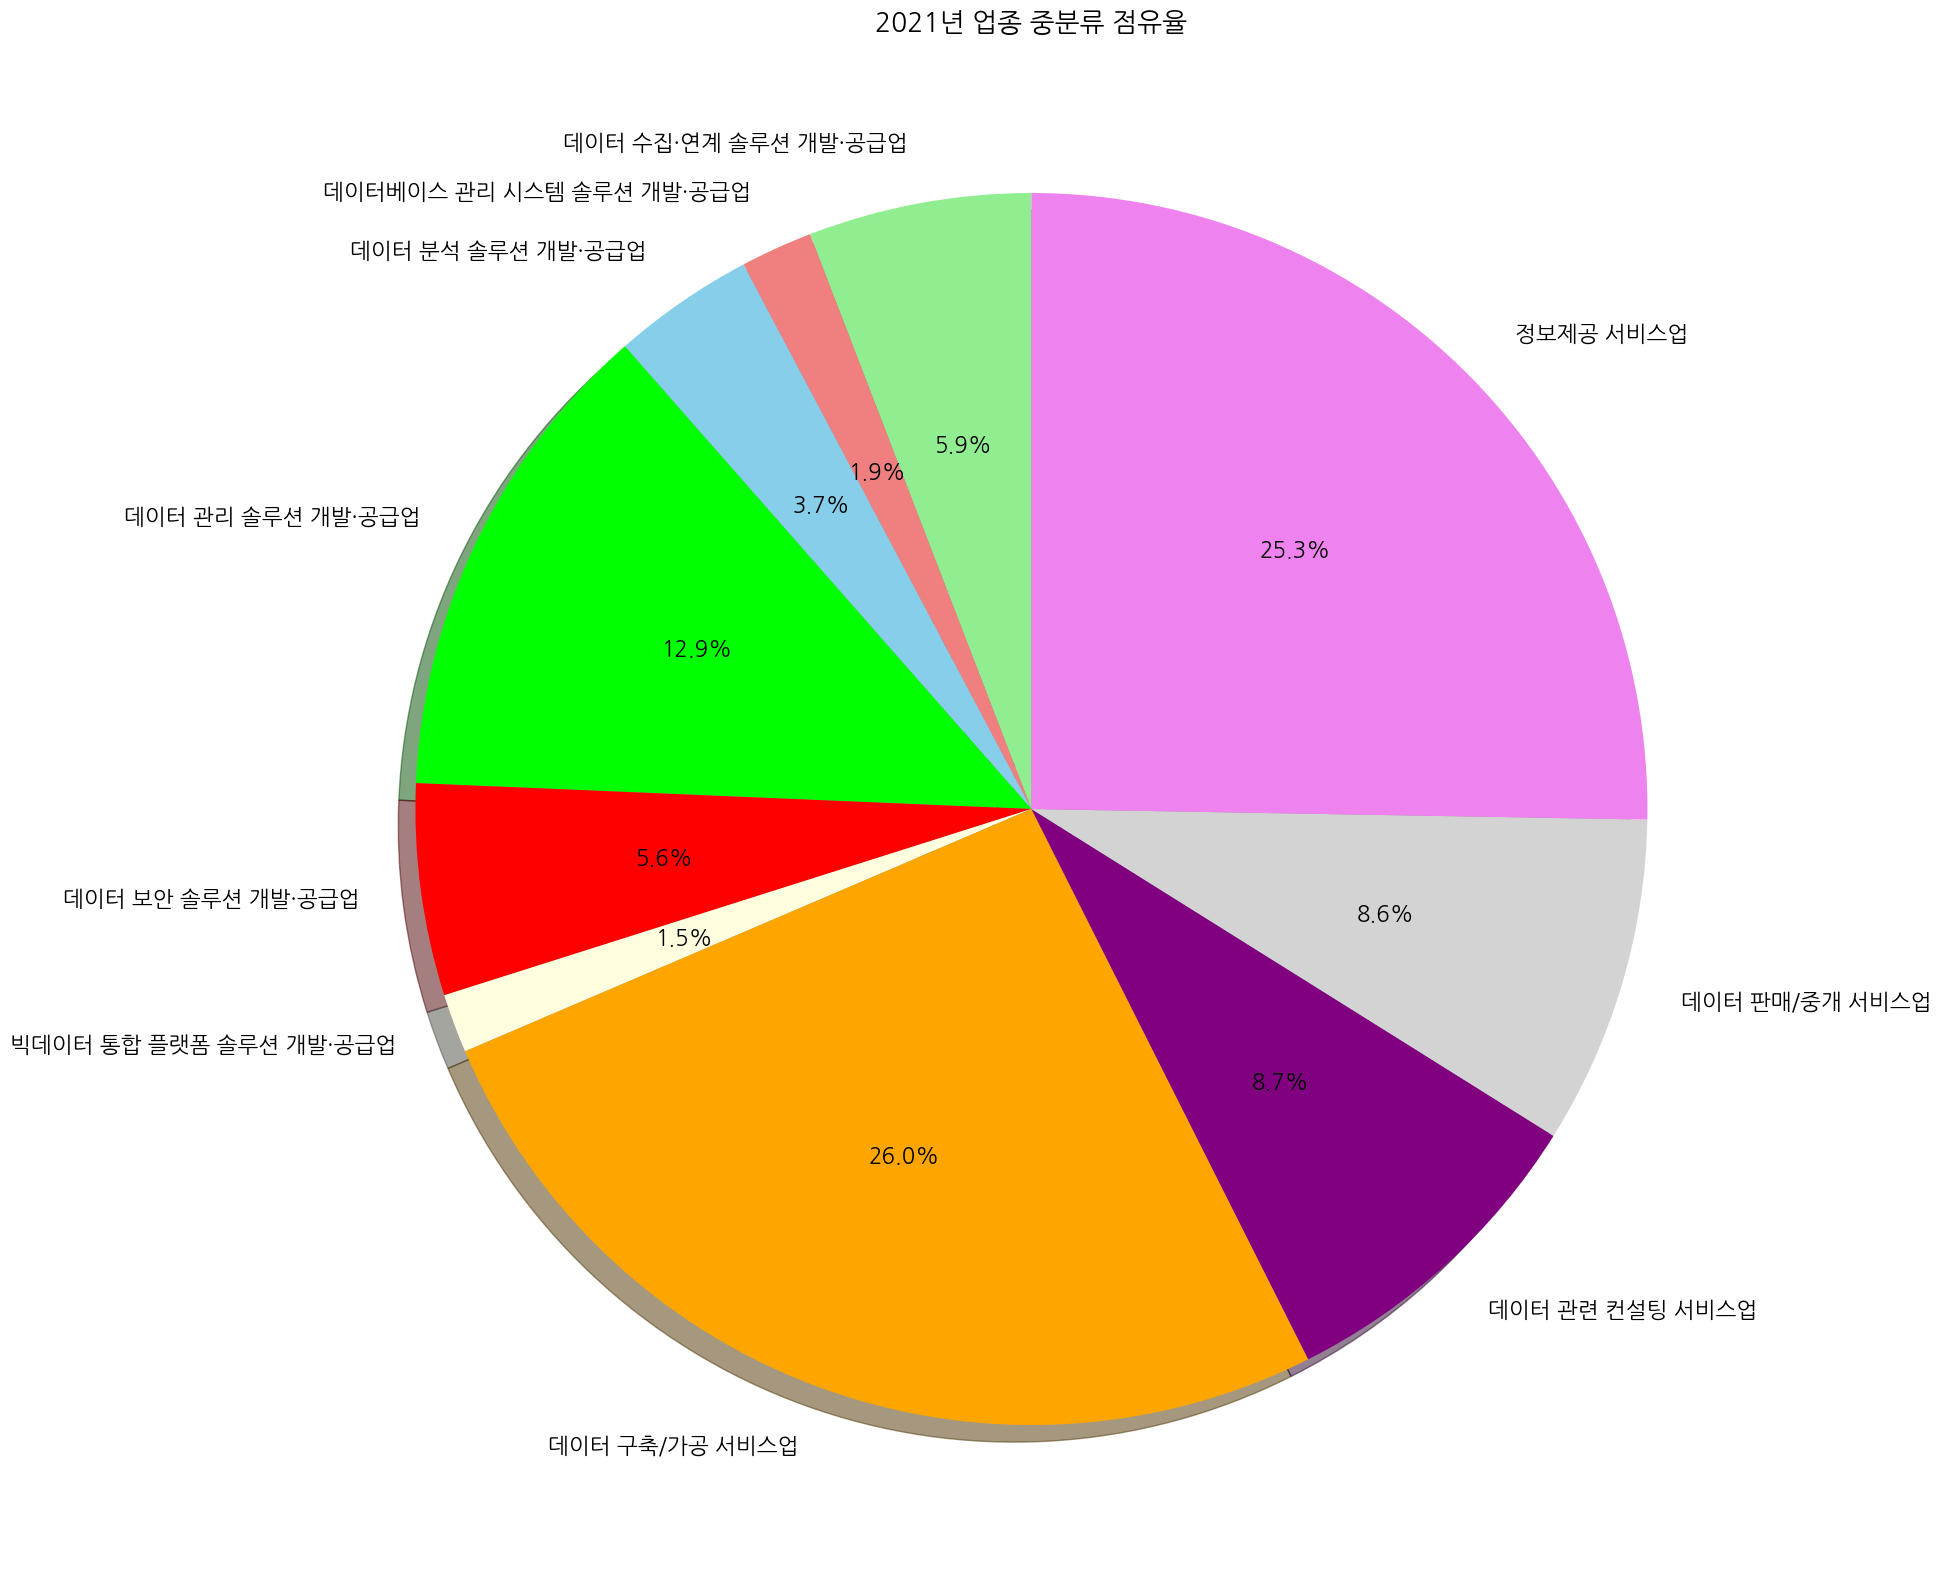

In [162]:
# 2021년 소분류 영위 기업수 시각화 - pie chart
sub_total = sub_ids_report.round(1).sum(axis=1)
sub_totals = ((sub_total / sub_total.sum()) * 100)

explode = [0,0,0,0,0,0,0,0,0,0]
colors = ['lightgreen', 'lightcoral', 'skyblue', 'lime', 'red', 'lightyellow', 'orange', 'purple', 'lightgrey', 'violet']

fig = plt.figure(figsize=(20,20))
plt.title('2021년 업종 중분류 점유율')
plt.pie(sub_totals.values, explode=explode, labels=sub_totals.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()